In [1]:
import pandas as pd 
import numpy as np 

pseudo-codigo no overleaf
entender e explicar o pseudo codigo
validar simulacao


estado dos carros:
cp(j), cd(j), cb(j), cf(j), ct(j)
posicao - direcao - botoes - andares - tempo

M=10 pisos, N=2 carros

estados dos pisos:
ff(i)[], fb(i), ftc(i)
fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa

    
    Ts=3600 %para 1 hora
    ftc = inicializar
    M = 10
    N = 2
    lambda_value = 0.005
    
    for ts=1:Ts
        for i=1:M (para cada andar)
            if ftc(i) <= ts then
                ftc(i) = ftc(i) + exp(1/lambda);
                d = gera_dest();
                c = atribui_car(d)
                ff(i) <-- [ftc ,ta ,d ,c ]
                fb(d) = 1; %explicar  
            end if
        endfor-m
        
        for j=1:N (para cada elevador)
            if cp(j) mod 30 <> 0 then
                if cd(j) = 1 then
                    cp(j) = cp(j) + 1;
                if cd(j) = -1 then
                    cp(j) = cp(j) -1;
                else ERRO1;
            end if
                   
            if cp(j) mod 30 = 0 then
                f = quoc(cp(j) mod 30);
                buscar_passageiros(f, cf(j), cd(j)) --> explicar?
                descarregar_passageiros(f, cb(j), cd(j))
                atualizar_direcao()
                mover()
            end if
                
        endfor-N
    end-for-ts
    
    
Lembrete: toda vez que retira passageiros da s filas, salva os dados daquele passageiro [ftc, ta] num arquivo, que poder ser em disco ou em memória, para calcular média e variância do tempo de espera.

In [2]:
#carro
#variaveis do carro:  (CPj, CDj, CBj, CGj, CTj) car position, 
#car direction, clicked button, car get passengers waiting, temporizer
class Car:
    def __init__(self, name, car_position = 0, passengers = [], car_direction = 0, pressed_buttons = [], car_passengers_waiting = set(), temporizer = 0):
        self.car_position = car_position
        self.car_direction = car_direction
        self.pressed_buttons = pressed_buttons #destinos dos passageiros
        self.car_passengers_waiting = car_passengers_waiting #andares que passageiros entrarão
        self.temporizer = temporizer
        self.name = name
        self.passengers = passengers
        
    def car_action(self, floor):
        if (floor.number in self.pressed_buttons):
            #retira os  passageiros
            remove = 0
            for p in self.passengers:
                print("Teste saida: {} para {}".format(p.destination, floor.number))
                if (p.destination == floor.number):
                    print("passageiro sai")
                    remove +=1
                    
            for i in range(remove):
                for p in self.passengers:
                    if (p.destination == floor.number):
                        if (floor.number in self.pressed_buttons):
                            self.pressed_buttons.remove(floor.number)
                        #atualiza o attendance
                        p.attendance = self.temporizer
                        #salva nos passageiros atendidos
                        passengers_served.append(p)
                        #remove do elevador
                        self.passengers.remove(p)
                
        
        #print("{} in {}".format(floor.number, self.car_passengers_waiting))
        self.update_direction()
                    
        if (floor.number in self.car_passengers_waiting):
            #print("Andar {}".format(floor.number))
            #pega os  passageiros
            passenger_still_waiting = False
            validation = len(floor.passengers_queue)
            count = 0
            aux_leave = []
            for p in floor.passengers_queue:
                #if (p.selected_car == self.name):
                if (p.destination > floor.number and (self.car_direction == 1 or self.car_direction == 0)):
                    #entra
                    #adiciona no elevador
                    self.passengers.append(p)
                    #remove do andar
                    #floor.passengers_queue.remove(p)                        
                    aux_leave.append(p)
                    #print("passageiro entra")
                    self.pressed_buttons.append(p.destination)
                    p.boarding = self.temporizer

                elif (p.destination < floor.number and (self.car_direction == -1 or self.car_direction == 0)):
                    #entra
                    #adiciona no elevador
                    self.passengers.append(p)
                    #remove do andar
                    #floor.passengers_queue.remove(p)  
                    aux_leave.append(p)
                    #print("passageiro entra")
                    self.pressed_buttons.append(p.destination)
                    p.boarding = self.temporizer
                else:
                    #print("ERROR2")
                    passenger_still_waiting = True
                    print("destination {} - andar {} - direcao {}".format(p.destination, floor.number, self.car_direction))
                    #print()
                count += 1
                
            for leave in aux_leave:
                floor.passengers_queue.remove(leave)              
            
            if (passenger_still_waiting):
                self.car_passengers_waiting.add(floor.number)
            else:
                while(True):
                    if (floor.number in self.car_passengers_waiting):
                        self.car_passengers_waiting.remove(floor.number)
                    else:
                        break
        
        
    def update_direction(self):
        # atualiza direcao
        if (self.car_direction == 0):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #print("car {} no action".format(self.name))
                    pass
                else:
                    solicited_floor = list(self.car_passengers_waiting)[0]
                    current_floor = int(self.car_position/30)
                    if(solicited_floor > current_floor or current_floor == 0):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                    elif(solicited_floor < current_floor or current_floor == (floor_number - 1)):
                        self.car_direction = -1
                        #print("car {} - going down".format(self.name))
            else:
                solicited_floor = self.pressed_button[0]
                current_floor = int(self.car_position/30)
                if(solicited_floor > current_floor):
                    self.car_direction = 1
                    #print("car {} - going up".format(self.name))
                elif(solicited_floor < current_floor):
                    self.car_direction = -1
                    #print("car {} - going down".format(self.name))
                
        elif(self.car_direction == 1):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    #print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra subir
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            #print("car {} - going up".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra descer
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors < current_floor):
                                self.car_direction = -1
                                #print("car {} - going down".format(self.name))
                                break
                                
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        #print("car {} - going up".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            #print("car {} - going down".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            #print("car {} - going down".format(self.name))
                            break
                            
        else:
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    print("{}".format(self.car_direction))
                    self.car_direction = 0
                    print("{}".format(self.car_direction))
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra descer
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            #print("car {} - going down".format(self.name))
                            keep_going = True
                            break
                    
                            
                    #verifica se tem pra subir
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors >= current_floor):
                                self.car_direction = 1
                                #print("car {} - going up".format(self.name))
                                break
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors < current_floor):
                        #print("car {} - going down".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors < current_floor):
                        #print("car {} - going down".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors >= current_floor):
                            self.car_direction = 1
                            #print("car {} - going up".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors >= current_floor):
                            self.car_direction = 1
                            #print("car {} - going up".format(self.name))
                            break
                            
    def new_passager_waiting(self, floor):
        self.car_passengers_waiting.add(floor.number)
        

In [3]:
from random import choice
import random
#andar
#ff(i)[], fb(i), ftc(i) ->
#fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa
class Floor:
    def __init__(self, number, passengers_queue = [], up_button = 0, down_button =  0, passagers_next_flow = int(np.random.exponential(1/0.004))):
        self.passengers_queue = passengers_queue
        self.up_button = up_button
        self.down_button = down_button
        self.passagers_next_flow = passagers_next_flow
        self.number = number
        
    def random_destination(self):
        return choice([i for i in range(0,10) if i not in [self.number]])
    
    def pure_up_destination(self):
        return choice([i for i in range(0,10) if i > self.number])
    
    def down_peak_destination(self, direction):
        if direction == 'down':
            return choice([i for i in range(0,self.number) if i not in [self.number]])
        else:
            return choice([i for i in range(self.number, len(floors)) if i not in [self.number]])

In [4]:
def pure_up_flow(iteration):
    if(iteration >= 900):
        return 50000
        
    fluxos = {0: 18, 1: 11, 2: 15, 3: 8, 4: 8, 5: 34, 6: 46, 7: 40, 8: 34, 9: 46, 10: 9, 11: 10, 12: 6, 13: 6, 14: 9}
    time = int(iteration/60)
    return 60/fluxos.get(time)

def pure_down_flow(simulation, floor, iteration):
    if(iteration >= 900 or len(simulation.get(floor)['down']) == 0):
        return 50000
    next_passager = min(simulation.get(floor)['down'])
    simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
    
    return next_passager
    
def down_peak_flow(simulation, floor, iteration):
    if(iteration >= 900 or (len(simulation.get(floor)['down']) == 0 and len(simulation.get(floor)['up']) == 0)):
        return 50000, 'down'
    
    
    if (len(simulation.get(floor)['down']) > 0 and len(simulation.get(floor)['up']) > 0):
        if (min(simulation.get(floor)['down']) < min(simulation.get(floor)['up'])):
           next_passager = min(simulation.get(floor)['down'])
           direct = 'down'
           simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
        else:
           next_passager = min(simulation.get(floor)['up'])
           direct = 'up'
           simulation.get(floor)['up'].remove(min(simulation.get(floor)['up']))
    
    elif (len(simulation.get(floor)['down']) > 0 and len(simulation.get(floor)['up']) == 0):
       next_passager = min(simulation.get(floor)['down'])
       direct = 'down'
       simulation.get(floor)['down'].remove(min(simulation.get(floor)['down']))
    else:
        next_passager = min(simulation.get(floor)['up'])
        direct = 'up'
        simulation.get(floor)['up'].remove(min(simulation.get(floor)['up']))
        
    
    return next_passager, direct

def generate_simulation(floors_numbers = [0, 1, 2, 3], numbers_ups = {0: 3}, numbers_downs = {0: 3}, times_number = 1):
    simulation = {}
    for f in floors_numbers:
        simulation[f] = {'up': [], 'down':[]}
    
    for i in range(times_number):
        ups = numbers_ups.get(i)
        downs = numbers_downs.get(i)
        
        if (ups is not None):
            for up in range(ups):
                t = np.random.randint(0, high = 60 , size=1)[0] + (i * 60)
                fl = choice([i for i in floors_numbers if i != max(floors_numbers)])
                simulation.get(fl)['up'].append(t)
        
        if (downs is not None):
            for down in range(downs):
                t = np.random.randint(0, high = 60 , size=1)[0] + (i * 60)
                fl = choice([i for i in floors_numbers if i != min(floors_numbers)])
                simulation.get(fl)['down'].append(t)
    return simulation
    
    

In [5]:
class Passager:
    def __init__(self, destination, arrive, selected_car, initial_floor, boarding, attendance):
        self.destination = destination
        self.arrive = arrive
        self.boarding = boarding
        self.attendance = attendance
        self.selected_car = selected_car
        self.initial_floor = initial_floor
    
    def __repr__(self):
        return "<Passager arrive:%s boarding:%s attendance:%s boarding_time:%s attendance_time:%s car:%s>" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

    def __str__(self):
        return "<Arrive:%s, Boarding:%s, Attendance:%s, Boarding_time:%s, Attendance_time:%s, Car:%s" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

In [6]:
#inicializacao 3600 iteracoes, 2 carros e 10 andares (0 a 9)
timer = 3600
floor_number = 10
car_number = 2
lambda_value = 3 #0.0055
simulation_type = 'DOWN_PEAK' # ['DOWN_PEAK', 'RANDOM', 'PURE_DOWN', 'PURE_UP']

passengers_served = []
all_passengers = []
cars = []
floors = []
names = ['A', 'B', 'C']
for x in range(car_number):
    cars.append(Car(name = names[x], pressed_buttons = [], passengers = [] , car_passengers_waiting = set()))

if (simulation_type == 'PURE_DOWN'):
    pure_down = {0: 17, 1: 17, 2: 13, 3: 13, 4: 10, 5: 34, 6: 31, 7: 26, 8: 41, 9: 38, 10: 13, 11: 12, 12: 14, 13: 8, 14: 12}    
    simulation = generate_simulation(floors_numbers = range(1,floor_number), numbers_ups = {}, numbers_downs = pure_down, times_number = 15)
    
if (simulation_type == 'DOWN_PEAK'):
    up_dp = {0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 2, 6: 2, 7: 0, 8: 2, 9: 0, 10: 1, 11: 2, 12: 1, 13: 0, 14: 0} 
    down_dp = {0: 7, 1: 10, 2: 7, 3: 9, 4: 12, 5: 10, 6: 8, 7: 8, 8: 10, 9: 18, 10: 11, 11: 6, 12: 12, 13: 2, 14: 15} 
    simulation = generate_simulation(floors_numbers = range(0,floor_number), numbers_ups = up_dp, numbers_downs = down_dp, times_number = 15)
    

for x in range(floor_number):
    #print(int(np.random.exponential(1/0.004)))
    if (simulation_type == 'RANDOM'):
        f_initial = np.random.exponential(1/lambda_value)
    elif (simulation_type == 'PURE_DOWN'):
        if (x != 0):
            f_initial = pure_down_flow(simulation, x, 0)
        else:
            f_initial = 5000
    elif (simulation_type == 'DOWN_PEAK'):
        f_initial = down_peak_flow(simulation, x, 0)
    else : 
        f_initial = 1
        
    floors.append(Floor(number = x, passagers_next_flow = f_initial, passengers_queue= []))

In [7]:
simulation

{0: {'up': [306], 'down': []},
 1: {'up': [149, 126, 319],
  'down': [200,
   399,
   413,
   395,
   532,
   547,
   558,
   633,
   626,
   673,
   709,
   741,
   873,
   861]},
 2: {'up': [370, 611],
  'down': [99,
   235,
   262,
   266,
   258,
   434,
   575,
   585,
   540,
   647,
   611,
   757,
   743,
   850,
   897,
   841]},
 3: {'up': [677],
  'down': [140,
   148,
   207,
   230,
   234,
   292,
   338,
   315,
   393,
   479,
   501,
   492,
   597,
   552,
   586,
   628,
   616,
   688,
   691,
   762,
   756,
   758,
   734,
   865]},
 4: {'up': [719],
  'down': [114, 136, 278, 287, 304, 436, 526, 628, 620, 637, 725, 870]},
 5: {'up': [119, 514],
  'down': [166,
   278,
   286,
   332,
   478,
   450,
   429,
   488,
   497,
   556,
   595,
   654,
   671,
   765,
   834,
   869]},
 6: {'up': [360],
  'down': [106, 165, 209, 293, 302, 370, 468, 605, 882, 870, 864]},
 7: {'up': [183, 728],
  'down': [194, 232, 415, 431, 525, 500, 598, 588, 562, 696, 733, 877]},
 8: {

In [8]:
def select_best_car(floor):
    #substituir carro mais proximo    
    smaller = 999999999
    for c in cars:
        if abs(floor.number - (c.car_position/30)) <= smaller:
            smaller = abs(floor.number - (c.car_position/30))
            #print("floor {} - car: {} - name {}".format(floor.number, c.car_position/30, c.name))
            min_dist = c
    return min_dist

In [9]:
def make_analyzes(passengers_served):
    column_names = ['arrive', 'boarding', 'attendance', 'selected_car', 'initial_floor', 'destination']
    df = pd.DataFrame([[getattr(i,j) for j in column_names] for i in passengers_served], columns = column_names)
    #add boarding_time and attendance_time
    df['wait_time'] = df.apply(lambda row: row.boarding - row.arrive, axis=1)
    df['journey_time'] = df.apply(lambda row: row.attendance - row.boarding, axis=1)
    df['total_time'] = df.apply(lambda row: row.attendance - row.arrive, axis=1)
    print(df)
    return df

In [10]:
def printar_andar(andar):
    print("Andar {} - fila {}".format(andar.number, len(andar.passengers_queue)))

def printar_carro(carro):
    print("Carro: {} - posicao {} - fila de passageiros {} - fila de andares {}".format(carro.name, carro.car_position, carro.pressed_buttons, carro.car_passengers_waiting))

In [11]:
for k in floors:
    print(k.passagers_next_flow)

(198, 'up')
(30, 'down')
(51, 'down')
(91, 'down')
(92, 'down')
(78, 'down')
(83, 'down')
(3, 'down')
(2, 'down')
(6, 'down')


In [12]:
for iteration in range(timer):
    print(iteration)
    floor = None 
    car = None
    selected_car = None
    for floor in floors:
        if (iteration % 30 == 0):
            printar_andar(floor)
        #print("Andar {} - fila {}".format(floor.number, floor.passengers_queue))
        res = type(floor.passagers_next_flow) is tuple
        if (res):
            print(floor.passagers_next_flow, floor.number)
            tuple_direction = floor.passagers_next_flow[1]
            floor.passagers_next_flow = floor.passagers_next_flow[0]
            
        if floor.passagers_next_flow <= iteration:
            #print("Andar {} - tempo {} - flow do andar {}".format(floor.number, iteration, floor.passagers_next_flow))
            if (simulation_type == 'RANDOM'):
                d = floor.random_destination()
                e = np.random.exponential(1/lambda_value)
                floor.passagers_next_flow = floor.passagers_next_flow + e
            elif (simulation_type == 'PURE_DOWN'):
                floor.passagers_next_flow = pure_down_flow(simulation, floor.number, iteration)
                if (floor.number == 0):
                    continue
                d = 0
            elif (simulation_type == 'PURE_UP'):
                e = pure_up_flow(iteration)
                if (floor.number != 0):
                    continue
                floor.passagers_next_flow = floor.passagers_next_flow + e
                d = floor.pure_up_destination()
            elif (simulation_type == 'DOWN_PEAK'):
                floor.passagers_next_flow = down_peak_flow(simulation, floor.number, iteration)
                print(floor.number, tuple_direction)
                d = floor.down_peak_destination(tuple_direction)
            
            selected_car = select_best_car(floor)
            #print("Floor: {} - Best Car {}".format(floor.number, selected_car.name))
            p = Passager(arrive = iteration, initial_floor = floor.number, destination = d, selected_car = selected_car.name, boarding = 0, attendance = 0)
            floor.passengers_queue.append(p)
            all_passengers.append(p)
            selected_car.new_passager_waiting(floor)
        elif (floor.passagers_next_flow > iteration and res):
            floor.passagers_next_flow = floor.passagers_next_flow, tuple_direction
    
    for car in cars:
        car.temporizer = iteration
        if (iteration % 30 == 0):
            printar_carro(car)
        
        if (car.car_position % 30 != 0):
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            else:
                print("ERROR1")
            
        elif (car.car_position % 30 == 0):
            
            f = int(car.car_position/30)
            floor = floors[f]
            car.car_action(floor)
            #print("Carro: {} - Andar {} - fila de passageiros {} - fila de andares {}".format(car.name, int(car.car_position/30), car.pressed_buttons, car.car_passengers_waiting))
            if (car.car_direction == 1):
                if (car.car_position == 270):
                    pass
                else:
                    car.car_position += 1
            elif (car.car_direction == -1):
                if (car.car_position == 0):
                    pass
                else:
                    car.car_position -= 1
            elif (len(car.pressed_buttons) == 0 and len(car.car_passengers_waiting) == 0):
                pass
            else:
                print("ERROR1.1")
            
#print(passengers_served)
result_df = make_analyzes(passengers_served)


0
Andar 0 - fila 0
(198, 'up') 0
Andar 1 - fila 0
(30, 'down') 1
Andar 2 - fila 0
(51, 'down') 2
Andar 3 - fila 0
(91, 'down') 3
Andar 4 - fila 0
(92, 'down') 4
Andar 5 - fila 0
(78, 'down') 5
Andar 6 - fila 0
(83, 'down') 6
Andar 7 - fila 0
(3, 'down') 7
Andar 8 - fila 0
(2, 'down') 8
Andar 9 - fila 0
(6, 'down') 9
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 0 - fila de passageiros [] - fila de andares set()
1
(198, 'up') 0
(30, 'down') 1
(51, 'down') 2
(91, 'down') 3
(92, 'down') 4
(78, 'down') 5
(83, 'down') 6
(3, 'down') 7
(2, 'down') 8
(6, 'down') 9
2
(198, 'up') 0
(30, 'down') 1
(51, 'down') 2
(91, 'down') 3
(92, 'down') 4
(78, 'down') 5
(83, 'down') 6
(3, 'down') 7
(2, 'down') 8
8 down
(6, 'down') 9
3
(198, 'up') 0
(30, 'down') 1
(51, 'down') 2
(91, 'down') 3
(92, 'down') 4
(78, 'down') 5
(83, 'down') 6
(3, 'down') 7
7 down
(201, 'down') 8
(6, 'down') 9
4
(198, 'up') 0
(30, 'down') 1
(51, 'down') 2
(91, 'down') 3
(92, 'down') 4
(78, '

(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(114, 'down') 4
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(111, 'down') 9
9 down
112
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(114, 'down') 4
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(141, 'down') 9
113
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(114, 'down') 4
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(141, 'down') 9
114
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(114, 'down') 4
4 down
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(141, 'down') 9
115
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(136, 'down') 4
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(141, 'down') 9
116
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(136, 'down') 4
(119, 'up') 5
(165, 'down') 6
(183, 'up') 7
(201, 'down') 8
(141, 'down') 9
117
(198, 'up') 0
(126, 'up') 1
(235, 'down') 2
(140, 'down') 3
(136

(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
249
(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
250
(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
251
(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
252
(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
253
(306, 'up') 0
(319, 'up') 1
(258, 'down') 2
(292, 'down') 3
(278, 'down') 4
(278, 'down') 5
(293, 'down') 6
(415, 'down') 7
(259, 'down') 8
(282, 'down') 9
254
(306, 'up') 0
(319, 'up') 1
(258, 'down'

(468, 'down') 6
(415, 'down') 7
(402, 'down') 8
(552, 'down') 9
401
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down') 5
(468, 'down') 6
(415, 'down') 7
(402, 'down') 8
(552, 'down') 9
402
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down') 5
(468, 'down') 6
(415, 'down') 7
(402, 'down') 8
8 down
(552, 'down') 9
403
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down') 5
(468, 'down') 6
(415, 'down') 7
(495, 'down') 8
(552, 'down') 9
404
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down') 5
(468, 'down') 6
(415, 'down') 7
(495, 'down') 8
(552, 'down') 9
405
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down') 5
(468, 'down') 6
(415, 'down') 7
(495, 'down') 8
(552, 'down') 9
406
(50000, 'down') 0
(413, 'down') 1
(434, 'down') 2
(479, 'down') 3
(436, 'down') 4
(429, 'down')

(562, 'down') 7
(540, 'down') 8
(552, 'down') 9
539
(50000, 'down') 0
(547, 'down') 1
(540, 'down') 2
(552, 'down') 3
(620, 'down') 4
(556, 'down') 5
(605, 'down') 6
(562, 'down') 7
(540, 'down') 8
(552, 'down') 9
540
Andar 0 - fila 2
(50000, 'down') 0
Andar 1 - fila 2
(547, 'down') 1
Andar 2 - fila 1
(540, 'down') 2
2 down
Andar 3 - fila 3
(552, 'down') 3
Andar 4 - fila 2
(620, 'down') 4
Andar 5 - fila 6
(556, 'down') 5
Andar 6 - fila 3
(605, 'down') 6
Andar 7 - fila 4
(562, 'down') 7
Andar 8 - fila 7
(540, 'down') 8
8 down
Andar 9 - fila 4
(552, 'down') 9
Carro: A - posicao 6 - fila de passageiros [] - fila de andares {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Carro: B - posicao 2 - fila de passageiros [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] - fila de andares {1, 2, 6, 8, 9}
541
(50000, 'down') 0
(547, 'down') 1
(575, 'down') 2
(552, 'down') 3
(620, 'down') 4
(556, 'down') 5
(605, 'down') 6
(562, 'down') 7
(557, 'down') 8
(552, 'down') 9
542
(50000, 'down') 0
(547, 'down') 1

(709, 'down') 1
(743, 'down') 2
(734, 'down') 3
(719, 'up') 4
(765, 'down') 5
(864, 'down') 6
(696, 'down') 7
(855, 'down') 8
(734, 'down') 9
695
(50000, 'down') 0
(709, 'down') 1
(743, 'down') 2
(734, 'down') 3
(719, 'up') 4
(765, 'down') 5
(864, 'down') 6
(696, 'down') 7
(855, 'down') 8
(734, 'down') 9
696
(50000, 'down') 0
(709, 'down') 1
(743, 'down') 2
(734, 'down') 3
(719, 'up') 4
(765, 'down') 5
(864, 'down') 6
(696, 'down') 7
7 down
(855, 'down') 8
(734, 'down') 9
destination 4 - andar 5 - direcao 1
destination 1 - andar 5 - direcao 1
destination 2 - andar 5 - direcao 1
destination 4 - andar 5 - direcao 1
destination 2 - andar 5 - direcao 1
destination 3 - andar 5 - direcao 1
destination 1 - andar 5 - direcao 1
destination 1 - andar 5 - direcao 1
destination 0 - andar 5 - direcao 1
697
(50000, 'down') 0
(709, 'down') 1
(743, 'down') 2
(734, 'down') 3
(719, 'up') 4
(765, 'down') 5
(864, 'down') 6
(728, 'up') 7
(855, 'down') 8
(734, 'down') 9
698
(50000, 'down') 0
(709, 'down') 1

(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(855, 'down') 8
(853, 'down') 9
853
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 2
(865, 'down') 3
(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(855, 'down') 8
(853, 'down') 9
9 down
854
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 2
(865, 'down') 3
(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(855, 'down') 8
(50000, 'down') 9
855
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 2
(865, 'down') 3
(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(855, 'down') 8
8 down
(50000, 'down') 9
856
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 2
(865, 'down') 3
(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(898, 'down') 8
(50000, 'down') 9
857
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 2
(865, 'down') 3
(870, 'down') 4
(869, 'down') 5
(864, 'down') 6
(877, 'down') 7
(898, 'down') 8
(50000, 'down') 9
858
(50000, 'down') 0
(861, 'down') 1
(897, 'down') 

(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1008
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1009
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1010
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1011
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1012
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50

(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1163
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1164
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1165
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1166
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1167
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1168
(50000, 'down') 

(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1326
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1327
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1328
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1329
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1330
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50

(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1489
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1490
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1491
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1492
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1493
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50

(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1652
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1653
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1654
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1655
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1656
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50

(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1816
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1817
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1818
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1819
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1820
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50

(50000, 'down') 9
1979
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1980
Andar 0 - fila 0
(50000, 'down') 0
Andar 1 - fila 0
(50000, 'down') 1
Andar 2 - fila 0
(50000, 'down') 2
Andar 3 - fila 0
(50000, 'down') 3
Andar 4 - fila 0
(50000, 'down') 4
Andar 5 - fila 0
(50000, 'down') 5
Andar 6 - fila 0
(50000, 'down') 6
Andar 7 - fila 0
(50000, 'down') 7
Andar 8 - fila 0
(50000, 'down') 8
Andar 9 - fila 0
(50000, 'down') 9
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 150 - fila de passageiros [] - fila de andares set()
1981
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
1982
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(5

(50000, 'down') 9
2141
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2142
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2143
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2144
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2145
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2146
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 

(50000, 'down') 8
(50000, 'down') 9
2301
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2302
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2303
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2304
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2305
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2306
(50000, 'down') 0
(50000, 'down') 

Andar 2 - fila 0
(50000, 'down') 2
Andar 3 - fila 0
(50000, 'down') 3
Andar 4 - fila 0
(50000, 'down') 4
Andar 5 - fila 0
(50000, 'down') 5
Andar 6 - fila 0
(50000, 'down') 6
Andar 7 - fila 0
(50000, 'down') 7
Andar 8 - fila 0
(50000, 'down') 8
Andar 9 - fila 0
(50000, 'down') 9
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 150 - fila de passageiros [] - fila de andares set()
2461
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2462
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2463
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2464
(50000, 'down') 0


2616
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2617
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2618
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2619
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2620
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2621
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 

(50000, 'down') 9
2773
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2774
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2775
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2776
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2777
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2778
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 

(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2937
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2938
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2939
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
2940
Andar 0 - fila 0
(50000, 'down') 0
Andar 1 - fila 0
(50000, 'down') 1
Andar 2 - fila 0
(50000, 'down') 2
Andar 3 - fila 0
(50000, 'down') 3
Andar 4 - fila 0
(50000, 'down') 4
Andar 5 - fila 0
(50000, 'down') 5
Andar 6 - fila 0
(50000, 'down') 6
Andar 7 - fila 0
(50000, 'down') 7
Andar 8 - fila 0
(50000, 'down') 8
Andar 9 - fila 0
(50000, 'down') 9
Carro: A - posicao

(50000, 'down') 8
(50000, 'down') 9
3100
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3101
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3102
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3103
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3104
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3105
(50000, 'down') 0
(50000, 'down') 

3252
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3253
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3254
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3255
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3256
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3257
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 

(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3406
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3407
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3408
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3409
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3410
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50

(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3568
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3569
(50000, 'down') 0
(50000, 'down') 1
(50000, 'down') 2
(50000, 'down') 3
(50000, 'down') 4
(50000, 'down') 5
(50000, 'down') 6
(50000, 'down') 7
(50000, 'down') 8
(50000, 'down') 9
3570
Andar 0 - fila 0
(50000, 'down') 0
Andar 1 - fila 0
(50000, 'down') 1
Andar 2 - fila 0
(50000, 'down') 2
Andar 3 - fila 0
(50000, 'down') 3
Andar 4 - fila 0
(50000, 'down') 4
Andar 5 - fila 0
(50000, 'down') 5
Andar 6 - fila 0
(50000, 'down') 6
Andar 7 - fila 0
(50000, 'down') 7
Andar 8 - fila 0
(50000, 'down') 8
Andar 9 - fila 0
(50000, 'down') 9
Carro: A - posicao 0 - fila de passageiros [] - fila de andares set()
Carro: B - posicao 150 - fila de passageiros [] - fila de andares set()
3571
(50000, 'down') 0
(5

In [13]:
result_df.describe()

,arrive,boarding,attendance,initial_floor,destination,wait_time,journey_time,total_time
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,458.85625,738.800000,832.362500,4.737500,2.268750,279.943750,93.562500,373.506250
std,249.50557,298.273371,296.265126,2.655213,2.469237,146.405066,64.665048,157.589747
min,2.00000,152.000000,242.000000,0.000000,0.000000,7.000000,30.000000,54.000000
25%,261.25000,452.000000,542.000000,3.000000,0.000000,160.750000,30.000000,252.250000
50%,483.50000,842.000000,992.000000,5.000000,1.500000,279.000000,90.000000,379.500000
75%,639.50000,992.000000,1052.000000,7.000000,3.000000,420.750000,120.000000,491.750000
max,898.00000,1356.000000,1566.000000,9.000000,9.000000,532.000000,270.000000,760.000000


In [14]:
#result_df
#mean 
means = result_df.mean(axis=0, numeric_only=True)  
print("Media chegada do elevador {}".format(means.wait_time))
print("Media de jornada no elevador {}".format(means.journey_time))
print("Media tempo de atendimento {}".format(means.total_time))
#result_df.var(axis=0)
print("-----------")
#variance      
variances = result_df.var(axis=0)  
print("Var chegada do elevador {}".format(variances.wait_time))
print("Var jornada no elevador {}".format(variances.journey_time))
print("Var tempo de atendimento {}".format(variances.total_time))
print("-----------")
stds = result_df.std(axis=0)  
print("Des. padrao chegada do elevador {}".format(stds.wait_time))
print("Des. padrao jornada no elevador {}".format(stds.journey_time))
print("Des. padrao tempo de atendimento {}".format(stds.total_time))

Media chegada do elevador 279.94375
Media de jornada no elevador 93.5625
Media tempo de atendimento 373.50625
-----------
Var chegada do elevador 21434.443356918226
Var jornada no elevador 4181.568396226415
Var tempo de atendimento 24834.52826257861
-----------
Des. padrao chegada do elevador 146.40506602204115
Des. padrao jornada no elevador 64.66504771688037
Des. padrao tempo de atendimento 157.5897466924121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F46344C08>]],
      dtype=object)

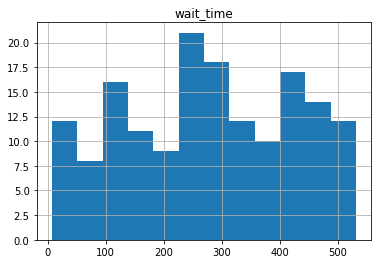

In [15]:
import math  
result_df.hist(column=['wait_time'], bins= int(math.sqrt(len(result_df.index))))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F477C0208>]],
      dtype=object)

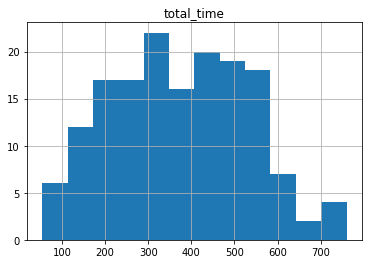

In [16]:
result_df.hist(column=['total_time'], bins= int(math.sqrt(len(result_df.index))))

In [17]:
result_df['direction'] = result_df.apply(lambda row: row.destination > row.initial_floor, axis=1)
result_df = result_df.replace(True, 'UP')
result_df = result_df.replace(False, 'DOWN')

In [18]:
result_df['time'] = result_df.apply(lambda row: int(row.arrive/60) , axis=1)

In [19]:
#result_df

In [20]:
result_df.groupby(['time', 'direction'])['arrive'].count()

time  direction
0     DOWN          7
1     DOWN         10
      UP            1
2     DOWN          7
      UP            2
3     DOWN          9
      UP            2
4     DOWN         12
5     DOWN         10
      UP            2
6     DOWN          8
      UP            2
7     DOWN          8
8     DOWN         10
      UP            2
9     DOWN         18
10    DOWN         11
      UP            1
11    DOWN          6
      UP            2
12    DOWN         12
      UP            1
13    DOWN          2
14    DOWN         15
Name: arrive, dtype: int64